In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_10 = pd.read_csv("ratings_after_timestamp_10.txt", names=['timestamp', 'user_id', 'endpoint'])
df_10

,timestamp,user_id,endpoint
0,2024-04-17T01:10:03,569293,GET /rate/the+shawshank+redemption+1994=4
1,2024-04-17T01:10:03,434903,GET /rate/filmistaan+2012=4
2,2024-04-17T01:10:04,766095,GET /rate/schindlers+list+1993=5
3,2024-04-17T01:10:04,291795,GET /rate/life+is+beautiful+1997=5
4,2024-04-17T01:10:04,449719,GET /rate/the+shawshank+redemption+1994=5
...,...,...,...
1571494,2024-04-20T00:56:09,559907,GET /rate/schindlers+list+1993=5
1571495,2024-04-20T00:56:10,312373,GET /rate/anne+of+green+gables+1985=4
1571496,2024-04-20T00:56:10,366584,GET /rate/stranger+on+the+prowl+1952=4
1571497,2024-04-20T00:56:10,203463,GET /rate/harry+potter+and+the+deathly+hallows...


In [5]:
df_3 = pd.read_csv("ratings_after_timestamp.txt", names=['timestamp', 'user_id', 'endpoint'])
df_3

,timestamp,user_id,endpoint
0,2024-04-20T21:38:57,990447,GET /rate/the+wave+2008=4
1,2024-04-20T21:38:58,843498,GET /rate/interstellar+2014=3
2,2024-04-20T21:38:58,606213,GET /rate/aliens+1986=4
3,2024-04-20T21:38:58,943700,GET /rate/the+shawshank+redemption+1994=5
4,2024-04-20T21:38:58,650551,GET /rate/half+nelson+2006=5
...,...,...,...
1214056,2024-04-23T03:19:12,447280,GET /rate/one+hundred+and+one+dalmatians+1961=3
1214057,2024-04-23T03:19:13,562219,GET /rate/seven+samurai+1954=5
1214058,2024-04-23T03:19:13,102163,GET /rate/schindlers+list+1993=5
1214059,2024-04-23T03:19:13,70606,GET /rate/beauty+and+the+beast+1991=3


In [6]:
df = pd.concat([df_10, df_3])
df

,timestamp,user_id,endpoint
0,2024-04-17T01:10:03,569293,GET /rate/the+shawshank+redemption+1994=4
1,2024-04-17T01:10:03,434903,GET /rate/filmistaan+2012=4
2,2024-04-17T01:10:04,766095,GET /rate/schindlers+list+1993=5
3,2024-04-17T01:10:04,291795,GET /rate/life+is+beautiful+1997=5
4,2024-04-17T01:10:04,449719,GET /rate/the+shawshank+redemption+1994=5
...,...,...,...
1214056,2024-04-23T03:19:12,447280,GET /rate/one+hundred+and+one+dalmatians+1961=3
1214057,2024-04-23T03:19:13,562219,GET /rate/seven+samurai+1954=5
1214058,2024-04-23T03:19:13,102163,GET /rate/schindlers+list+1993=5
1214059,2024-04-23T03:19:13,70606,GET /rate/beauty+and+the+beast+1991=3


In [7]:
df[['movie', 'rating']] = df['endpoint'].str.split('=', expand=True)
df.drop('endpoint', axis=1, inplace=True)
df['movie'] = df['movie'].str.replace("GET /rate/", '')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df

,timestamp,user_id,movie,rating
0,2024-04-17 01:10:03,569293,the+shawshank+redemption+1994,4
1,2024-04-17 01:10:03,434903,filmistaan+2012,4
2,2024-04-17 01:10:04,766095,schindlers+list+1993,5
3,2024-04-17 01:10:04,291795,life+is+beautiful+1997,5
4,2024-04-17 01:10:04,449719,the+shawshank+redemption+1994,5
...,...,...,...,...
1214056,2024-04-23 03:19:12,447280,one+hundred+and+one+dalmatians+1961,3
1214057,2024-04-23 03:19:13,562219,seven+samurai+1954,5
1214058,2024-04-23 03:19:13,102163,schindlers+list+1993,5
1214059,2024-04-23 03:19:13,70606,beauty+and+the+beast+1991,3


In [8]:
del df_3, df_10

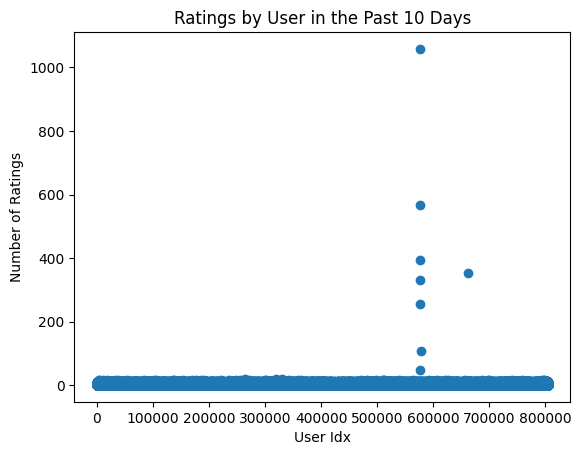

In [10]:
plt.scatter(np.arange(df['user_id'].nunique()), df.groupby('user_id')['rating'].count())
plt.xlabel("User Idx")
plt.ylabel("Number of Ratings")
plt.title("Ratings by User in the Past 10 Days")
plt.show()

In [11]:
df['user_id'].value_counts()

user_id
745136    1058
745126     566
745147     394
841240     353
745146     330
          ... 
373627       1
887277       1
221071       1
447896       1
142111       1
Name: count, Length: 804471, dtype: int64

In [12]:
fishy_user1 = df.query('user_id == "745147"')
fishy_user1['movie'].value_counts()

movie
kill+bill+vol.+2+2004              58
jackie+brown+1997                  50
nixon+1995                         40
jfk+1991                           37
kill+bill+vol.+1+2003              35
django+unchained+2012              35
born+on+the+fourth+of+july+1989    32
death+proof+2007                   27
reservoir+dogs+1992                26
platoon+1986                       23
natural+born+killers+1994          18
pulp+fiction+1994                  10
alexander+2004                      3
Name: count, dtype: int64

In [13]:
fishy_user1['timestamp'].max() - fishy_user1['timestamp'].min()

Timedelta('5 days 16:53:25')

In [14]:
fishy_user2 = df.query("user_id == '745136'")
fishy_user2['movie'].value_counts()

movie
natural+born+killers+1994          135
alexander+2004                     100
nixon+1995                          87
death+proof+2007                    85
jfk+1991                            85
reservoir+dogs+1992                 84
born+on+the+fourth+of+july+1989     78
pulp+fiction+1994                   76
django+unchained+2012               73
platoon+1986                        71
kill+bill+vol.+1+2003               68
kill+bill+vol.+2+2004               68
jackie+brown+1997                   48
Name: count, dtype: int64

In [15]:
fishy_user2['timestamp'].max() - fishy_user2['timestamp'].min()

Timedelta('5 days 21:04:23')